### NLP
* 형태소 분석기 설치 konlpy
* java 1.7+
* jpype 설치 whl 로 설치
* pip install konlpy
* JAVA_HOME 설정


In [31]:
import tensorflow as tf
from tensorflow import keras


In [32]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation

In [33]:
from konlpy.tag import *

In [34]:
kkma=Kkma()
okt=Okt()

In [35]:
c='내가 받은 마음에 기뻐하고 행복을 꿈꾸기 이전에 사랑의 끝을 먼저 생각하고 슬퍼하는 것은 얼마나 어리석은 일인가. 꽃도 사람도 사랑도 다양하다. 끝나버린 사랑의 끝이 비록 아팠더라도, 새로운 시작에 두려움부터 갖지 않길.'
n=kkma.nouns(c)
print(n)

['내가', '마음', '행복', '이전', '사랑', '끝', '생각', '일', '꽃', '사람', '다양', '새', '시작', '두려움']


### 데이터 추출하기

In [77]:
def readData(file,rb=1000000):
    with open(file,'r',encoding='utf-8') as f:
        data=[line.strip().split('\t')[1:] for line in f.readlines(rb)]
    return data[1:]
train_data=readData('ratings_train.txt')
test_data=readData('ratings_test.txt',50000)
print(train_data[-1:])

[['고경표 진짜 미쳤닼ㅋㅋㅋ', '1']]


#### 워드클라우드
* pip install wordcloud


In [37]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(24,24))
import matplotlib.font_manager as fm
font_location='malgun.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)


<Figure size 1728x1728 with 0 Axes>

In [38]:
from wordcloud import WordCloud

* 워드 클라우드용 데이터 생성 : 데이터 합치기

In [39]:
sdata=train_data
c=''
for s in sdata:
    c+=s[0]
print(c[:100])    

아 더빙.. 진짜 짜증나네요 목소리흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나너무재밓었다그래서보는것을추천한다교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정사이


In [40]:
w=WordCloud(
    font_path='malgun.ttf',
    width=800,
    height=600
)
w=w.generate(c)
#w.words_

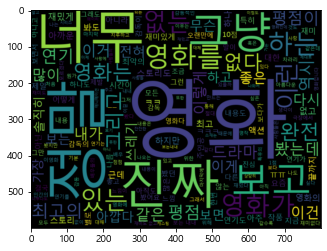

In [41]:
plt.imshow(w,interpolation='bilinear')
plt.show()

In [42]:
ht=okt.pos(c)
print(ht[:50])

[('아', 'Exclamation'), ('더빙', 'Noun'), ('..', 'Punctuation'), ('진짜', 'Noun'), ('짜증나네요', 'Adjective'), ('목소리', 'Noun'), ('흠', 'Noun'), ('...', 'Punctuation'), ('포스터', 'Noun'), ('보고', 'Noun'), ('초딩', 'Noun'), ('영화', 'Noun'), ('줄', 'Noun'), ('....', 'Punctuation'), ('오버', 'Noun'), ('연기', 'Noun'), ('조차', 'Josa'), ('가볍지', 'Adjective'), ('않구나', 'Verb'), ('너', 'Modifier'), ('무재', 'Noun'), ('밓었', 'Noun'), ('다그', 'Noun'), ('래서', 'Noun'), ('보는것을', 'Verb'), ('추천', 'Noun'), ('한', 'Josa'), ('다', 'Adverb'), ('교도소', 'Noun'), ('이야기', 'Noun'), ('구먼', 'Noun'), ('..', 'Punctuation'), ('솔직히', 'Adjective'), ('재미', 'Noun'), ('는', 'Josa'), ('없다', 'Adjective'), ('..', 'Punctuation'), ('평점', 'Noun'), ('조정', 'Noun'), ('사이', 'Modifier'), ('몬페', 'Noun'), ('그', 'Determiner'), ('의', 'Noun'), ('익살스런', 'Adjective'), ('연기', 'Noun'), ('가', 'Josa'), ('돋보였던', 'Verb'), ('영화', 'Noun'), ('!', 'Punctuation'), ('스파이더맨', 'Noun')]


### 형태소 데이터 생성

In [43]:
import json


In [44]:
def tokenize(data):
    return ['/'.join(t) for t in okt.pos(data)]
r=tokenize(train_data[0][0])
print(r)

['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나네요/Adjective', '목소리/Noun']


In [45]:
def makedata(mdata):
    return [(tokenize(w[0]),w[1]) for w in mdata]
    
r =makedata(train_data)
print(r[:10])

[(['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나네요/Adjective', '목소리/Noun'], '0'), (['흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍지/Adjective', '않구나/Verb'], '1'), (['너/Modifier', '무재/Noun', '밓었/Noun', '다그/Noun', '래서/Noun', '보는것을/Verb', '추천/Noun', '한/Josa', '다/Adverb'], '0'), (['교도소/Noun', '이야기/Noun', '구먼/Noun', '../Punctuation', '솔직히/Adjective', '재미/Noun', '는/Josa', '없다/Adjective', '../Punctuation', '평점/Noun', '조정/Noun'], '0'), (['사이/Modifier', '몬페/Noun', '그/Determiner', '의/Noun', '익살스런/Adjective', '연기/Noun', '가/Josa', '돋보였던/Verb', '영화/Noun', '!/Punctuation', '스파이더맨/Noun', '에서/Josa', '늙어/Verb', '보이기만/Verb', '했던/Verb', '커스틴/Noun', '던스트/Noun', '가/Josa', '너무나도/Adverb', '이뻐/Adjective', '보였다/Verb'], '1'), (['막/Noun', '걸음/Noun', '마/Noun', '뗀/Verb', '3/Number', '세/Noun', '부터/Josa', '초등학교/Noun', '1/Number', '학년/Noun', '생인/Noun', '8/Number', '살용/Verb', '영화/Noun', './Punctuation', 'ㅋㅋㅋ/K

#### 파일화 작업


In [46]:
import os
train_file= 'train_data.json'
test_file= 'test_data.json'
if(os.path.isfile(train_file)):
    with open(train_file,'r',encoding='utf-8') as f:
        train_doc=json.load(f)
else:
    train_doc=makedata(train_data)

if(os.path.isfile(test_file)):
    with open(test_file,'r',encoding='utf-8') as f:
        test_doc=json.load(f)
else:
    test_doc=makedata(test_data)

print(test_doc[0])
print(train_doc[0])
print(len(test_doc))
print(len(train_doc))

(['굳/Adjective', 'ㅋ/KoreanParticle'], '1')
(['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나네요/Adjective', '목소리/Noun'], '0')
2181
2146


In [47]:
tokens= [t for tr in train_doc for t in tr[0]]
print(tokens[:20])

['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나네요/Adjective', '목소리/Noun', '흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍지/Adjective', '않구나/Verb', '너/Modifier']


#### nltk 활용 주요 토큰 추출
* pip install nltk
* pip install numpy --upgrade 

In [48]:
import nltk

In [49]:
txt=nltk.Text(tokens)
print(txt)

<Text: 아/Exclamation 더빙/Noun ../Punctuation 진짜/Noun 짜증나네요/Adjective 목소리/Noun 흠/Noun .../Punctuation...>


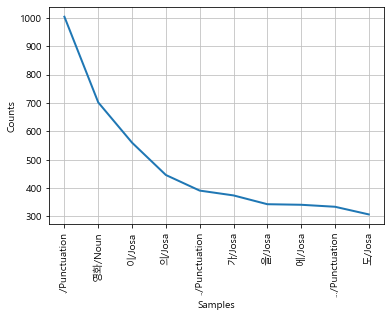

In [50]:
txt.plot(10)

#### 핵심어구 추출

In [51]:
sel_token=[f[0] for f in txt.vocab().most_common(1000)]
print(len(sel_token))

1000


In [52]:
def frev(doc):
    return [doc.count(stoken) for stoken in sel_token]
d=frev(train_doc[99][0])
#print(d)

In [53]:
train_x=[frev(d) for d,_ in train_doc]
train_y=[y for _,y in train_doc]
test_x=[frev(d) for d,_ in test_doc]
test_y=[y for _,y in test_doc]

In [54]:
print(train_y[0])
#print(train_x[0])


0


In [55]:
import numpy as np
train_x=np.asarray(train_x).astype('float32')
train_y=np.asarray(train_y).astype('float32')
test_x=np.asarray(test_x).astype('float32')
test_y=np.asarray(test_y).astype('float32')


In [58]:
model =Sequential()
model.add(Dense(64,activation='relu',input_shape=(1000,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


W0804 14:36:52.519145  7076 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 14:36:52.522138  7076 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [59]:
model.compile(optimizer='sgd',loss='mse',metrics=['accuracy'])

W0804 14:38:06.072192  7076 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [62]:
model.fit(train_x,train_y,epochs=100,batch_size=10)

Epoch 1/100
2146/2146 [==============================] - 0s 85us/step - loss: 0.2397 - acc: 0.6337
Epoch 2/100
2146/2146 [==============================] - 0s 79us/step - loss: 0.2380 - acc: 0.6323
Epoch 3/100
2146/2146 [==============================] - 0s 77us/step - loss: 0.2363 - acc: 0.6500
Epoch 4/100
2146/2146 [==============================] - 0s 76us/step - loss: 0.2343 - acc: 0.6598
Epoch 5/100
2146/2146 [==============================] - 0s 75us/step - loss: 0.2322 - acc: 0.6622
Epoch 6/100
2146/2146 [==============================] - 0s 80us/step - loss: 0.2298 - acc: 0.6640
Epoch 7/100
2146/2146 [==============================] - 0s 80us/step - loss: 0.2271 - acc: 0.6761
Epoch 8/100
2146/2146 [==============================] - 0s 79us/step - loss: 0.2241 - acc: 0.6836
Epoch 9/100
2146/2146 [==============================] - 0s 86us/step - loss: 0.2209 - acc: 0.6864
Epoch 10/100
2146/2146 [==============================] - 0s 88us/step - loss: 0.2172 - acc: 0.6976
Epoch 11/

In [65]:
result=model.evaluate(test_x,test_y)
print(result)

2181/2181 [==============================] - 0s 19us/step
[0.1981392038464273, 0.7253553416137573]


In [73]:
def nlptest(review):
    token=tokenize(review)
    tf=frev(token)
    #print(tf)
    data=np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
    score=float(model.predict(data))
    if(score>0.5):
        print(score,'%로 긍정적인 표현을 보이고 있습니다.')
    else:
        print(score,'%로 부정적인 표현을 보이고 있습니다.')
       

In [76]:
nlptest("야 증말 이런게 영화라고 보지마라") 
nlptest("대박 이영화 꼭 보세요") 
nlptest("이 영화 보는데는 시간 아깝다") 

0.6605101227760315 %로 긍정적인 표현을 보이고 있습니다.
0.9915705919265747 %로 긍정적인 표현을 보이고 있습니다.
0.04120907187461853 %로 부정적인 표현을 보이고 있습니다.
